In [566]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler 
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [567]:
# loading dataset
file = './birthweight_low.xlsx'

# reading dataset as xlxs using pandas
birthweight = pd.read_excel(io=file)

#showing general info of dataset
# birthweight.info()
birthweight.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [568]:
# drop NaN values from dataframe
birthweight = birthweight.fillna(birthweight.mean())

# dropping the target value bwght
X = birthweight.drop('bwght', axis=1)

# assigning target var to y
y = birthweight['bwght']


[ -10.28676606   12.93873425   -0.            0.84797108   -4.56058932
    8.79434269    0.           67.86490834  -35.43527604 -112.81103052
    7.6735337    22.32374408   -0.           -0.           -0.
   30.08367427   -0.        ]


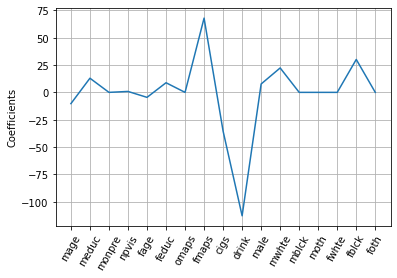

In [569]:

# Feature selection 
feature_names = birthweight.drop('bwght', axis=1).columns

lasso = Lasso(alpha=0.4, normalize=True)
lasso_coef = lasso.fit(X, y).coef_

#print lasso coeffs
print(lasso_coef)

# Plot the coefficients and determining the most important predictor
plt.plot(range(len(feature_names)), lasso_coef)
plt.xticks(range(len(feature_names)),feature_names, rotation=60)
plt.ylabel('Coefficients')
plt.grid()
plt.show()

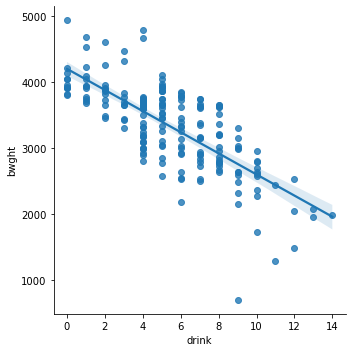

In [570]:

# Here is the most important predictors and target var that we will be using to build our models
y = birthweight[['bwght']]
X = birthweight[['drink', 'cigs', 'foth', 'fage']]

# Below is the scatter plot showing strong correlation 
# between x-drink(the-strongest predictor var) and our target y var

sns.lmplot(x = 'drink', y = 'bwght', data = birthweight)

In [571]:
# # Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=219)

In [572]:
# Linear Regression Model

# reg = LinearRegression()
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Compute predictions 
y_pred = reg.predict(X_test)

# Printing reg score for train and test sets
print('Test set score: ', reg.score(X_test, y_test))
print('Train set score: ', reg.score(X_train, y_train))

# Saving scoring data for future use
reg_test_score = reg.score(X_test, y_test)
reg_train_score = reg.score(X_train, y_train)

# displaying and saving the gap between training and testing
print('Linear Regression Train-Test Gap :', abs(reg_train_score - reg_test_score).round(4))
reg_test_gap = abs(reg_train_score - reg_test_score).round(4)

Test set score:  0.7256438508802141
Train set score:  0.6759555416119594
Linear Regression Train-Test Gap : 0.0497


In [573]:
# INSTANTIATING a model object
ard_model = ARDRegression()

# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_model.fit(X_test, y_test)

# Prrinting test and train scores
print('Testing Score :', ard.score(X_test, y_test))
print('Training Score:', ard.score(X_train, y_train))

# saving scoring data for future use
ard_train_score = ard.score(X_train, y_train)
ard_test_score  = ard.score(X_test, y_test)


# displaying and saving the gap between training and testing

print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Testing Score : 0.727776229116043
Training Score: 0.6755837223184566
ARD Train-Test Gap : 0.0522


/Users/yaku/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yaku/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [574]:
# Lasso Regression

# INSTANTIATING a model object
lasso = Lasso(alpha=1.0, normalize=True)

# FITTING to the training data
lasso_fit = lasso.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso.predict(X_test)


# SCORING the results
print('Lasso Training Score :', lasso.score(X_train, y_train).round(4))
print('Lasso Testing Score  :', lasso.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso.score(X_train, y_train) # using R-square
lasso_test_score  = lasso.score(X_test, y_test)   # using R-square


# displaying and saving the gap between training and testing
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)
print('Lasso Train-Test Gap :', lasso_test_gap)


Lasso Training Score : 0.6751
Lasso Testing Score  : 0.7275
Lasso Train-Test Gap : 0.0524
